In [65]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
kkk = 1

In [66]:
def g(x):
    return np.e**(-2*np.sin(2*x)) + 2*np.cos(2*x)
a = -np.pi
b = 2 * np.pi

In [67]:
def fun_painter(func, names, points = None, title=None):
    global kkk
    plt.figure()
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    for i in range(len(func)):
        x = np.linspace(a, b, 1000)
        y = func[i](x)
        plt.plot(x, y, label=names[i])
    plt.legend()
    if title is not None:
        plt.title(title)
    if points is not None:
        plt.plot(points[0], points[1], marker='o', linestyle='')
    name = "obrazek" + str(kkk) + ".png"
    plt.savefig(name,bbox_inches='tight')
    kkk+=1
    plt.show()

In [68]:
def generate_regular(a, b, f, n):
    x = np.linspace(a, b, n)
    y = f(x)
    return x, y

thousand_test_points = np.linspace(a, b, 1000) 

In [69]:
def max_diff(p, f=g, points=thousand_test_points):
    res = 0
    for i in points:
        res = max(res, abs(f(i) - p(i)))
    return res

In [70]:
def sum_diff(p, f=g, points=thousand_test_points):
    res = 0
    for i in points:
        res += (f(i) - p(i)) ** 2
    return res / len(points)

In [71]:
def approx(xs, ys, m):
    if len(xs) // 2 < m or m < 1:
        return None
    n = len(xs)
    
    def transform_x(x):
        return 2/3 * x - 1/3 * np.pi
    
    def a_k(k):
        a_sum = 0
        for i in range(n):
            a_sum += ys[i] * np.cos(k * xs[i])
        return 2 * a_sum / n

    def b_k(k):
        b_sum = 0
        for i in range(n):
            b_sum += ys[i] * np.sin(k * xs[i])
        return 2 * b_sum / n
    
    xs = list(map(transform_x, xs))
    ak = list(map(a_k, range(m+1)))
    bk = list(map(b_k, range(m+1)))
    
    def f(x):
        x = transform_x(x)
        y = 1/2 * ak[0]
        for k in range(1, m+1):
            y += ak[k] * np.cos(k * x) + bk[k] * np.sin(k * x)
        return y
            
    return f

In [72]:
def generate_summary(n, m_list):
    x_nodes, y_nodes = generate_regular(a, b, g, n)

    print("------------------------------APROKSYMACJA------------------------------")
    print(f"Wyniki aproksymacji dla {n} węzłów:")

    latex_rows = ""

    for m in m_list:
        f = approx(x_nodes, y_nodes, m)
        if f is None:
            print(f"Nie można wyznaczyć aproksymacji dla m = {m}")
            continue
        max_diff_f = max_diff(f, f=g, points=thousand_test_points)
        sum_diff_f = sum_diff(f, f=g, points=thousand_test_points)

        print(f"Dla m = {m}:")
        print(f"Maksymalna różnica: {max_diff_f}")
        print(f"Błąd średni kwadratowy: {sum_diff_f}")
        print("----------------------------------------------------------------------")

        latex_rows += f"{m} & {max_diff_f:.4f} & {sum_diff_f:.4f} \\\\\n"

        fun_painter([g, f], ['f(x)', 'Aproksymacja'], points=(x_nodes, y_nodes), title=f"Aproksymacja dla m={m} i {n} węzłów")

    latex_code = f"""
\\noindent\\begin{{minipage}}{{\\linewidth}}
\\centering
\\begin{{table}}[H]
\\centering
\\begin{{tabular}}{{c|c|c}}
       m           & Maksymalna różnica & Średni błąd kwadratowy  \\\\
\\hline
{latex_rows}
\\end{{tabular}}
\\captionsetup{{justification=centering}}
\\caption{{Porównanie błędów i maksymalnych różnic dla aproksymacji wielomianowej dla różnych wartości m przy {n} węzłach.}}
\\end{{table}}
\\end{{minipage}}
"""
    print(latex_code)

------------------------------APROKSYMACJA------------------------------
Wyniki aproksymacji dla 5 węzłów:
Dla m = 2:
Maksymalna różnica: 9.368548024258569
Błąd średni kwadratowy: 16.780173176630175
----------------------------------------------------------------------


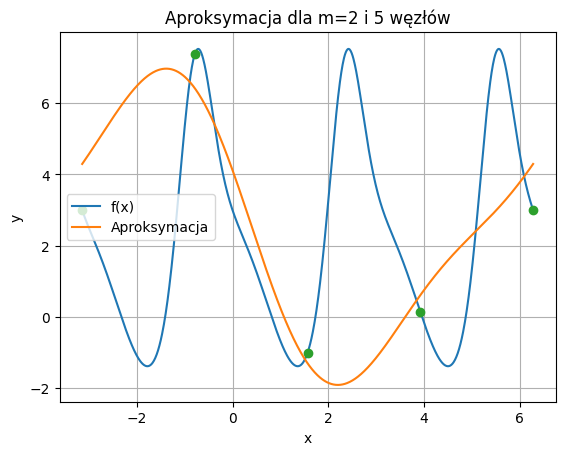

Nie można wyznaczyć aproksymacji dla m = 3
Nie można wyznaczyć aproksymacji dla m = 4
Nie można wyznaczyć aproksymacji dla m = 5

\noindent\begin{minipage}{\linewidth}
\centering
\begin{table}[H]
\centering
\begin{tabular}{c|c|c}
       m           & Maksymalna różnica & Średni błąd kwadratowy  \\
\hline
2 & 9.3685 & 16.7802 \\

\end{tabular}
\captionsetup{justification=centering}
\caption{Porównanie błędów i maksymalnych różnic dla aproksymacji wielomianowej dla różnych wartości m przy 5 węzłach.}
\end{table}
\end{minipage}


In [73]:
generate_summary(5, [2, 3, 4, 5])

------------------------------APROKSYMACJA------------------------------
Wyniki aproksymacji dla 10 węzłów:
Dla m = 3:
Maksymalna różnica: 2.8322158125992605
Błąd średni kwadratowy: 1.7482699545801692
----------------------------------------------------------------------


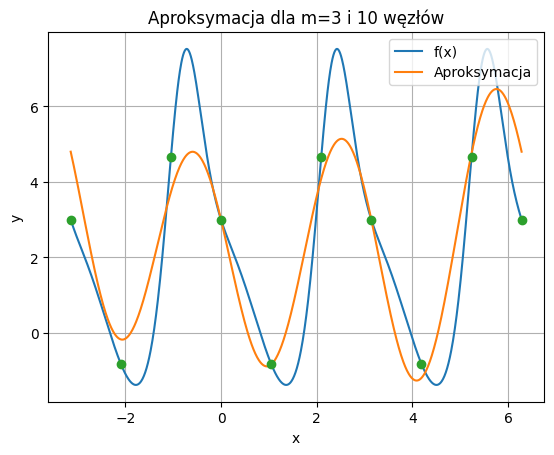

Dla m = 5:
Maksymalna różnica: 3.053202402564204
Błąd średni kwadratowy: 2.113669954580171
----------------------------------------------------------------------


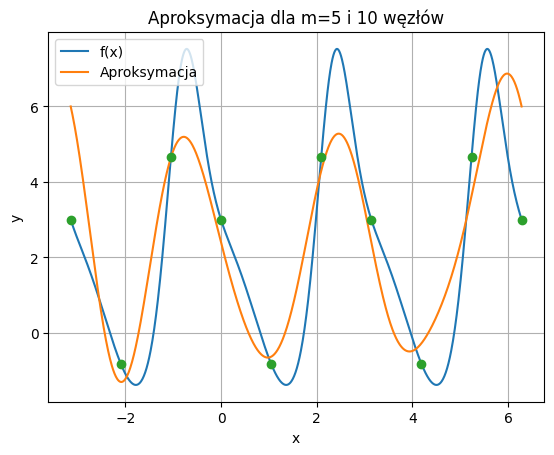

Nie można wyznaczyć aproksymacji dla m = 7
Nie można wyznaczyć aproksymacji dla m = 9

\noindent\begin{minipage}{\linewidth}
\centering
\begin{table}[H]
\centering
\begin{tabular}{c|c|c}
       m           & Maksymalna różnica & Średni błąd kwadratowy  \\
\hline
3 & 2.8322 & 1.7483 \\
5 & 3.0532 & 2.1137 \\

\end{tabular}
\captionsetup{justification=centering}
\caption{Porównanie błędów i maksymalnych różnic dla aproksymacji wielomianowej dla różnych wartości m przy 10 węzłach.}
\end{table}
\end{minipage}


In [74]:
generate_summary(10, [3, 5, 7, 9])

------------------------------APROKSYMACJA------------------------------
Wyniki aproksymacji dla 15 węzłów:
Dla m = 3:
Maksymalna różnica: 2.6059649544154073
Błąd średni kwadratowy: 1.3129293157500759
----------------------------------------------------------------------


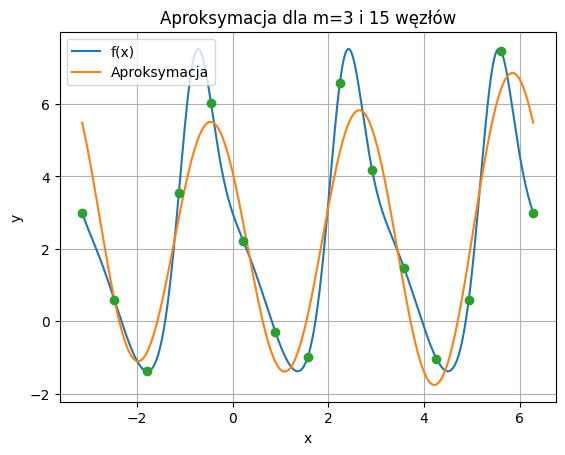

Dla m = 6:
Maksymalna różnica: 2.721057720763329
Błąd średni kwadratowy: 0.7224282647257779
----------------------------------------------------------------------


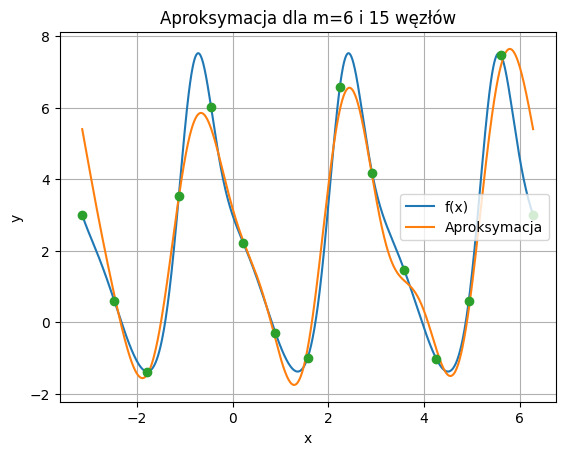

Nie można wyznaczyć aproksymacji dla m = 11
Nie można wyznaczyć aproksymacji dla m = 13

\noindent\begin{minipage}{\linewidth}
\centering
\begin{table}[H]
\centering
\begin{tabular}{c|c|c}
       m           & Maksymalna różnica & Średni błąd kwadratowy  \\
\hline
3 & 2.6060 & 1.3129 \\
6 & 2.7211 & 0.7224 \\

\end{tabular}
\captionsetup{justification=centering}
\caption{Porównanie błędów i maksymalnych różnic dla aproksymacji wielomianowej dla różnych wartości m przy 15 węzłach.}
\end{table}
\end{minipage}


In [75]:
generate_summary(15, [3, 6, 11, 13])

------------------------------APROKSYMACJA------------------------------
Wyniki aproksymacji dla 20 węzłów:
Dla m = 3:
Maksymalna różnica: 2.351475099907157
Błąd średni kwadratowy: 1.1714970631175485
----------------------------------------------------------------------


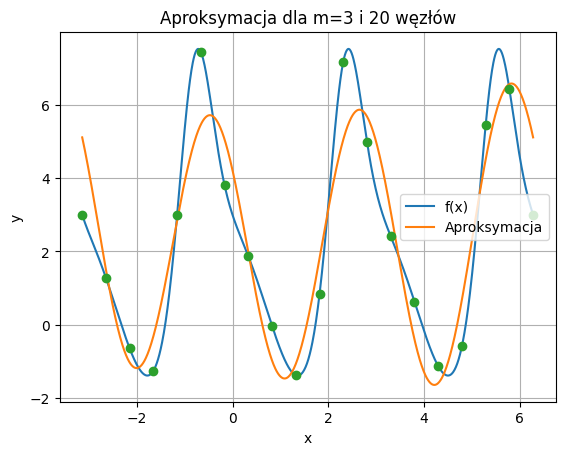

Dla m = 6:
Maksymalna różnica: 1.8830305771677476
Błąd średni kwadratowy: 0.37965933383382217
----------------------------------------------------------------------


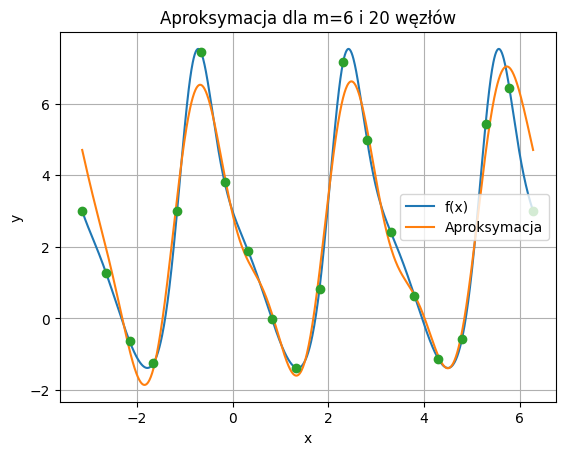

Nie można wyznaczyć aproksymacji dla m = 11
Nie można wyznaczyć aproksymacji dla m = 15

\noindent\begin{minipage}{\linewidth}
\centering
\begin{table}[H]
\centering
\begin{tabular}{c|c|c}
       m           & Maksymalna różnica & Średni błąd kwadratowy  \\
\hline
3 & 2.3515 & 1.1715 \\
6 & 1.8830 & 0.3797 \\

\end{tabular}
\captionsetup{justification=centering}
\caption{Porównanie błędów i maksymalnych różnic dla aproksymacji wielomianowej dla różnych wartości m przy 20 węzłach.}
\end{table}
\end{minipage}


In [76]:
generate_summary(20, [3, 6, 11, 15])

------------------------------APROKSYMACJA------------------------------
Wyniki aproksymacji dla 30 węzłów:
Dla m = 4:
Maksymalna różnica: 2.184367583601124
Błąd średni kwadratowy: 1.1232783740810324
----------------------------------------------------------------------


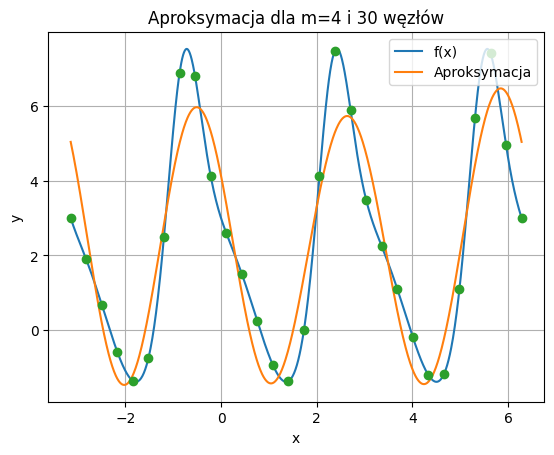

Dla m = 6:
Maksymalna różnica: 1.3769182804115125
Błąd średni kwadratowy: 0.22220093848478506
----------------------------------------------------------------------


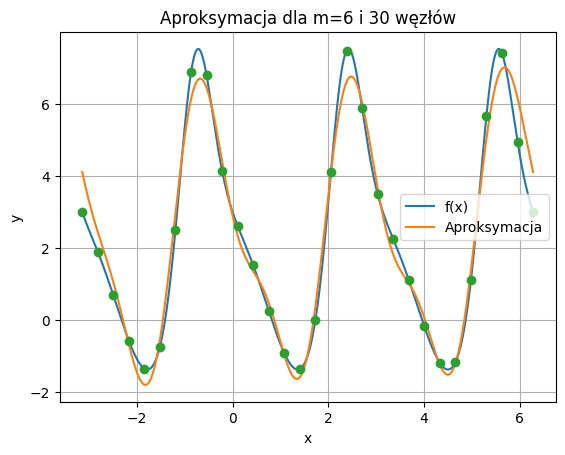

Dla m = 11:
Maksymalna różnica: 2.1031488122851476
Błąd średni kwadratowy: 0.23435913066920117
----------------------------------------------------------------------


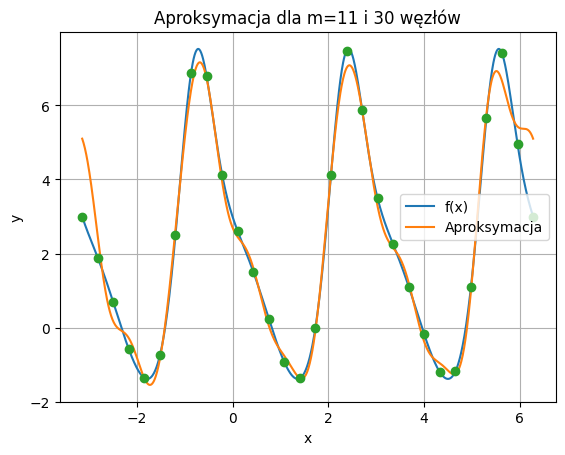

Nie można wyznaczyć aproksymacji dla m = 24

\noindent\begin{minipage}{\linewidth}
\centering
\begin{table}[H]
\centering
\begin{tabular}{c|c|c}
       m           & Maksymalna różnica & Średni błąd kwadratowy  \\
\hline
4 & 2.1844 & 1.1233 \\
6 & 1.3769 & 0.2222 \\
11 & 2.1031 & 0.2344 \\

\end{tabular}
\captionsetup{justification=centering}
\caption{Porównanie błędów i maksymalnych różnic dla aproksymacji wielomianowej dla różnych wartości m przy 30 węzłach.}
\end{table}
\end{minipage}


In [77]:
generate_summary(30, [4, 6, 11, 24])

------------------------------APROKSYMACJA------------------------------
Wyniki aproksymacji dla 50 węzłów:
Dla m = 4:
Maksymalna różnica: 2.0817152886258423
Błąd średni kwadratowy: 1.0741278347636671
----------------------------------------------------------------------


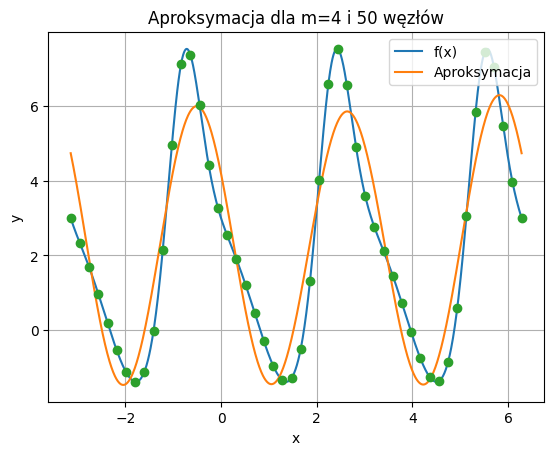

Dla m = 7:
Maksymalna różnica: 1.0513507720652342
Błąd średni kwadratowy: 0.1485848817920599
----------------------------------------------------------------------


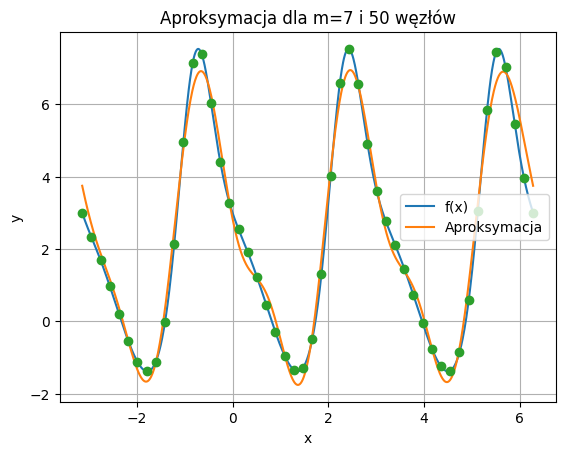

Dla m = 11:
Maksymalna różnica: 1.2252225078032506
Błąd średni kwadratowy: 0.08791049673662578
----------------------------------------------------------------------


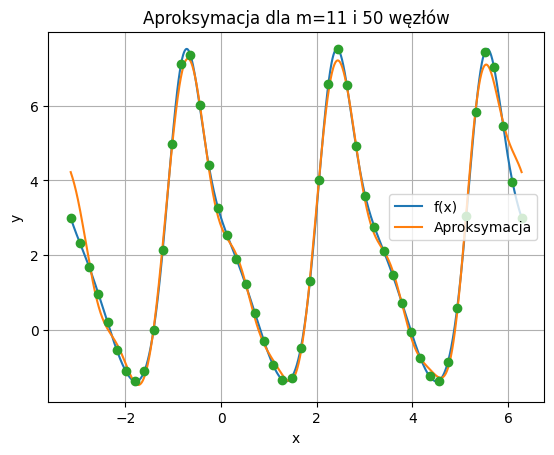

Dla m = 24:
Maksymalna różnica: 2.8799999999999613
Błąd średni kwadratowy: 0.1826405762515143
----------------------------------------------------------------------


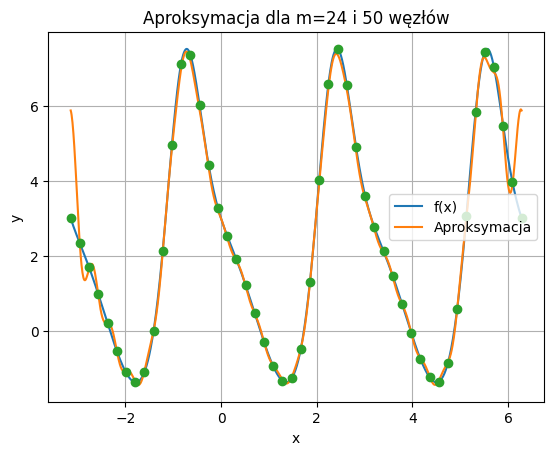


\noindent\begin{minipage}{\linewidth}
\centering
\begin{table}[H]
\centering
\begin{tabular}{c|c|c}
       m           & Maksymalna różnica & Średni błąd kwadratowy  \\
\hline
4 & 2.0817 & 1.0741 \\
7 & 1.0514 & 0.1486 \\
11 & 1.2252 & 0.0879 \\
24 & 2.8800 & 0.1826 \\

\end{tabular}
\captionsetup{justification=centering}
\caption{Porównanie błędów i maksymalnych różnic dla aproksymacji wielomianowej dla różnych wartości m przy 50 węzłach.}
\end{table}
\end{minipage}


In [78]:
generate_summary(50, [4, 7, 11, 24])

------------------------------APROKSYMACJA------------------------------
Wyniki aproksymacji dla 100 węzłów:
Dla m = 5:
Maksymalna różnica: 1.954509219995849
Błąd średni kwadratowy: 1.0551206293617428
----------------------------------------------------------------------


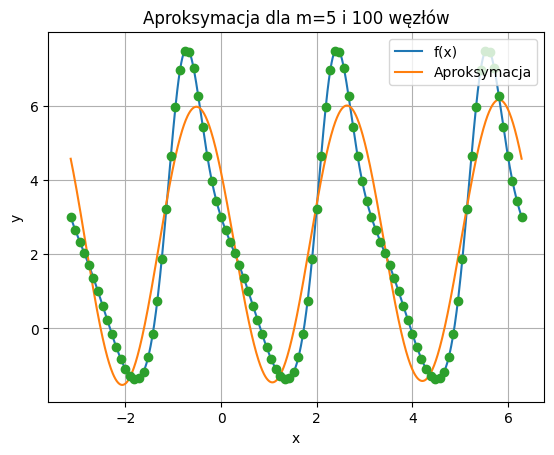

Dla m = 8:
Maksymalna różnica: 0.7599687250468534
Błąd średni kwadratowy: 0.110776956893676
----------------------------------------------------------------------


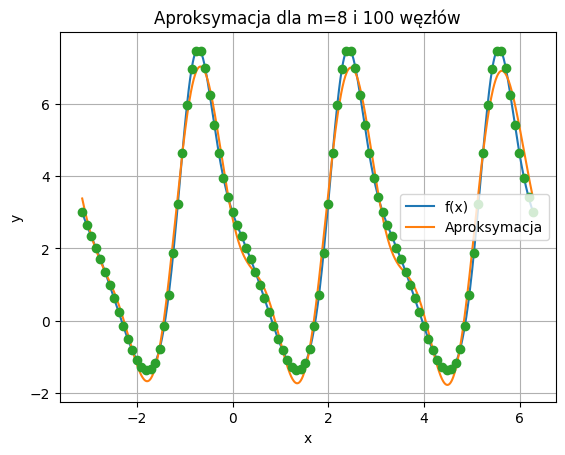

Dla m = 11:
Maksymalna różnica: 0.5660340985029473
Błąd średni kwadratowy: 0.025924697314068514
----------------------------------------------------------------------


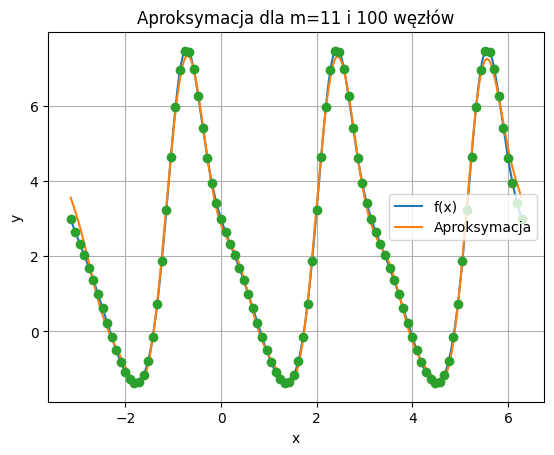

Dla m = 30:
Maksymalna różnica: 1.799999995560944
Błąd średni kwadratowy: 0.05761576198972312
----------------------------------------------------------------------


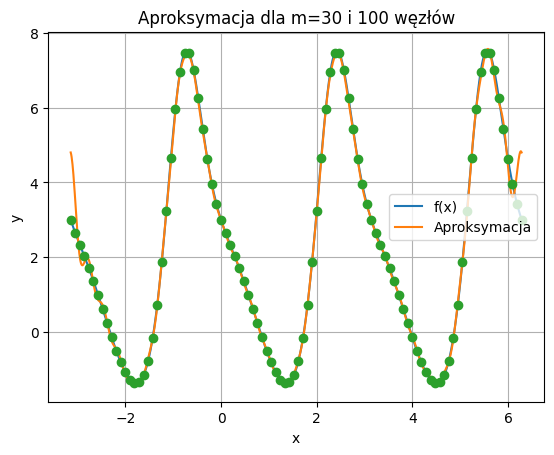


\noindent\begin{minipage}{\linewidth}
\centering
\begin{table}[H]
\centering
\begin{tabular}{c|c|c}
       m           & Maksymalna różnica & Średni błąd kwadratowy  \\
\hline
5 & 1.9545 & 1.0551 \\
8 & 0.7600 & 0.1108 \\
11 & 0.5660 & 0.0259 \\
30 & 1.8000 & 0.0576 \\

\end{tabular}
\captionsetup{justification=centering}
\caption{Porównanie błędów i maksymalnych różnic dla aproksymacji wielomianowej dla różnych wartości m przy 100 węzłach.}
\end{table}
\end{minipage}


In [79]:
generate_summary(100, [5, 8, 11, 30])

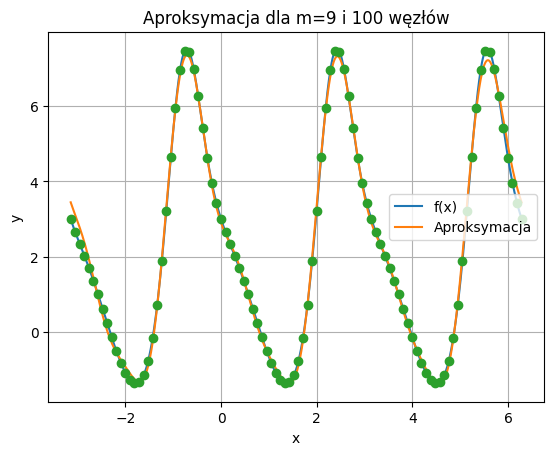

In [80]:
# n_min = 2
# m_min = 2
# value = 100
# for n in range(2, 101):
#     for m in range(2, n):
#         x_nodes, y_nodes = generate_regular(a, b, g, n)
#         f = approx(x_nodes, y_nodes, m)
#         if f is None:
#             continue
#         max_diff_f = max_diff(f, f=g, points=thousand_test_points)
#         if max_diff_f < value:
#             value = max_diff_f
#             n_min = n
#             m_min = m
# print(f"Minimalna wartość maksymalnej różnicy: {value}")
# print(f"n: {n_min}")
# print(f"m: {m_min}")

n_min = 100
m_min = 9
pr = generate_regular(a, b, g, n_min)
f = approx(pr[0], pr[1], m_min)
fun_painter([g, f], ['f(x)', 'Aproksymacja'], points=(pr[0], pr[1]), title=f"Aproksymacja dla m={m_min} i {n_min} węzłów")
#Minimalna wartość maksymalnej różnicy: 0.45385019247821967
# n: 100
# m: 9

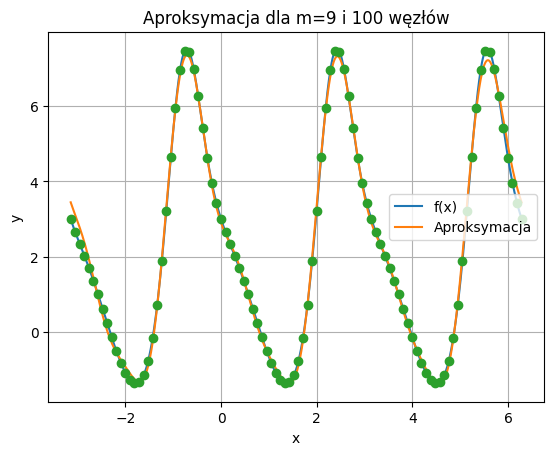

In [81]:
# n_min = 2
# m_min = 2
# value = 100
# for n in range(2, 101):
#     for m in range(2, n):
#         x_nodes, y_nodes = generate_regular(a, b, g, n)
#         f = approx(x_nodes, y_nodes, m)
#         if f is None:
#             continue
#         sum_diff_f = sum_diff(f, f=g, points=thousand_test_points)
#         if sum_diff_f < value:
#             value = sum_diff_f
#             n_min = n
#             m_min = m
# print(f"Minimalna wartość błędu średniego kwadratowego: {value}")
# print(f"n: {n_min}")
# print(f"m: {m_min}")

n_min = 100
m_min = 9
pr = generate_regular(a, b, g, n_min)
f = approx(pr[0], pr[1], m_min)
fun_painter([g, f], ['f(x)', 'Aproksymacja'], points=(pr[0], pr[1]), title=f"Aproksymacja dla m={m_min} i {n_min} węzłów")

#Minimalna wartość błędu średniego kwadratowego: 0.02220765614858004
#n: 100
#m: 9

In [82]:
def generate_latex_error_table(m, n):
    results = []
    for n_offset in range(-5, 6):
        current_n = n + n_offset
        row = [current_n]
        xs, ys = generate_regular(a, b, g, current_n)
        approx_func = approx(xs, ys, m)
        if approx_func is None:
            row.append("X")
            results.append(row)
            continue
        max_diff_value = max_diff(approx_func)

        row.append(max_diff_value)
        results.append(row)

    latex_table_header = "\\begin{table}[htbp]\n\\centering\n\\begin{minipage}{\\linewidth}\n\\centering\n\\begin{tabular}{l|l}\n"
    latex_table_footer = "\\end{tabular}\n\\caption{Porównanie maksymalnych różnic dla %d stopnia wielomianu od %d. do %d. węzłow}\n\\end{minipage}\n\\end{table}" % (m, results[0][0], results[-1][0])

    latex_table = latex_table_header
    latex_table += "n & Maksymalna różnica \\\\\n\\hline\n"

    for i, result in enumerate(results):
        if i < len(results) - 1:
            latex_table += "{} & {} \\\\\n\\hline\n".format(*result)
        else:
            latex_table += "{} & {}\n".format(*result)  

    latex_table += latex_table_footer

    print(latex_table)

In [83]:
generate_latex_error_table(9, 100)

\begin{table}[htbp]
\centering
\begin{minipage}{\linewidth}
\centering
\begin{tabular}{l|l}
n & Maksymalna różnica \\
\hline
95 & 0.48110226866764005 \\
\hline
96 & 0.47538270807747907 \\
\hline
97 & 0.46983309065498924 \\
\hline
98 & 0.4643967307309187 \\
\hline
99 & 0.45907019625985646 \\
\hline
100 & 0.45385019247821967 \\
\hline
101 & 0.4487335551080962 \\
\hline
102 & 0.4437396334052903 \\
\hline
103 & 0.43887739428404515 \\
\hline
104 & 0.4341086597612809 \\
\hline
105 & 0.4294307582770456
\end{tabular}
\caption{Porównanie maksymalnych różnic dla 9 stopnia wielomianu od 95. do 105. węzłow}
\end{minipage}
\end{table}


In [84]:
def generate_latex_error_table2(m, n):
    results = []
    for n_offset in range(-5, 6):
        current_n = n + n_offset
        row = [current_n]
        xs, ys = generate_regular(a, b, g, current_n)
        approx_func = approx(xs, ys, m)
        if approx_func is None:
            row.append("X")
            results.append(row)
            continue
        max_sum_value = sum_diff(approx_func)

        row.append(max_sum_value)
        results.append(row)

    latex_table_header = "\\begin{table}[htbp]\n\\centering\n\\begin{minipage}{\\linewidth}\n\\centering\n\\begin{tabular}{l|l}\n"
    latex_table_footer = "\\end{tabular}\n\\caption{Porównanie średniego błędu kwadratowego dla %d stopnia wielomianu od %d. do %d. węzłow}\n\\end{minipage}\n\\end{table}" % (m, results[0][0], results[-1][0])
    
    latex_table = latex_table_header
    latex_table += "n & Maksymalna różnica \\\\\n\\hline\n"
    
    for i, result in enumerate(results):
        if i < len(results) - 1:
            latex_table += "{} & {} \\\\\n\\hline\n".format(*result)
        else:
            latex_table += "{} & {}\n".format(*result)
    
    latex_table += latex_table_footer
    
    print(latex_table)

In [85]:
generate_latex_error_table2(9, 100)

\begin{table}[htbp]
\centering
\begin{minipage}{\linewidth}
\centering
\begin{tabular}{l|l}
n & Maksymalna różnica \\
\hline
95 & 0.024034800480417395 \\
\hline
96 & 0.023646394763107505 \\
\hline
97 & 0.023269951403158847 \\
\hline
98 & 0.022904984400492576 \\
\hline
99 & 0.022551032183126117 \\
\hline
100 & 0.02220765614858004 \\
\hline
101 & 0.02187443930587815 \\
\hline
102 & 0.021550985010305303 \\
\hline
103 & 0.02123691578373618 \\
\hline
104 & 0.020931872213996002 \\
\hline
105 & 0.02063551192725537
\end{tabular}
\caption{Porównanie średniego błędu kwadratowego dla 9 stopnia wielomianu od 95. do 105. węzłow}
\end{minipage}
\end{table}


In [86]:
def generate_summary_table(n_list, m_list):
    results_sum = []
    results_max = []
    for m in m_list:  # Zmiana kolejności iteracji
        for n in n_list:  # Zmiana kolejności iteracji
            if m < n:
                x_nodes, y_nodes = generate_regular(a, b, g, n)
                f = approx(x_nodes, y_nodes, m)
                if f is None:
                    results_max.append([n, m, "X"])
                    results_sum.append([n, m, "X"])
                    continue
                max_diff_f = max_diff(f, f=g, points=thousand_test_points)
                sum_diff_f = sum_diff(f, f=g, points=thousand_test_points)
                results_max.append([n, m, max_diff_f])
                results_sum.append([n, m, sum_diff_f])
            else:
                results_max.append([n, m, "X"])
                results_sum.append([n, m, "X"])

    max_table = "\\begin{table}[htbp]\n\\centering\n\\begin{minipage}{\\linewidth}\n\\centering\n\\begin{tabular}{l|"
    for _ in range(len(n_list)):  # Zmiana długości pętli
        max_table += "l|"
    max_table = max_table[:-1] + "}\n$n$"
    for n in n_list:  # Zmiana kolejności iteracji
        max_table += " & {}".format(n)
    max_table += " \\\\\n\\hline\n"
    for m in m_list:  # Zmiana kolejności iteracji
        max_table += "{}".format(m)
        for n in n_list:  # Zmiana kolejności iteracji
            found = False
            for result in results_max:
                if result[0] == n and result[1] == m:
                    if result[2] == "X":
                        max_table += " & X"
                    elif isinstance(result[2], (int, float)):
                        max_table += " & {:.4f}".format(round(result[2], 4))
                    else:
                        max_table += " & {}".format(result[2])
                    found = True
                    break
            if not found:
                max_table += " & X"
        max_table += " \\\\\n\\hline\n"
    max_table += "\\end{tabular}\n\\end{minipage}\n\\end{table}\n\n"

    # Tabela sum różnic kwadratowych
    sum_table = "\\begin{table}[htbp]\n\\centering\n\\begin{minipage}{\\linewidth}\n\\centering\n\\begin{tabular}{l|"
    for _ in range(len(n_list)):  # Zmiana długości pętli
        sum_table += "l|"
    sum_table = sum_table[:-1] + "}\n$n$"
    for n in n_list:  # Zmiana kolejności iteracji
        sum_table += " & {}".format(n)
    sum_table += " \\\\\n\\hline\n"
    for m in m_list:  # Zmiana kolejności iteracji
        sum_table += "{}".format(m)
        for n in n_list:  # Zmiana kolejności iteracji
            found = False
            for result in results_sum:
                if result[0] == n and result[1] == m:
                    if result[2] == "X":
                        sum_table += " & X"
                    elif isinstance(result[2], (int, float)):
                        sum_table += " & {:.4f}".format(round(result[2], 4))
                    else:
                        sum_table += " & {}".format(result[2])
                    found = True
                    break
            if not found:
                sum_table += " & X"
        sum_table += " \\\\\n\\hline\n"
    sum_table += "\\end{tabular}\n\\end{minipage}\n\\end{table}"

    print(max_table)
    print(sum_table)

In [87]:
generate_summary_table([5, 10, 15, 20, 30, 50, 100], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 24, 30])

\begin{table}[htbp]
\centering
\begin{minipage}{\linewidth}
\centering
\begin{tabular}{l|l|l|l|l|l|l|l}
$n$ & 5 & 10 & 15 & 20 & 30 & 50 & 100 \\
\hline
2 & 9.3685 & 5.8017 & 5.7266 & 5.5217 & 5.4297 & 5.3560 & 5.3007 \\
\hline
3 & X & 2.8322 & 2.6060 & 2.3515 & 2.2100 & 2.0971 & 2.0126 \\
\hline
4 & X & 2.8304 & 2.9689 & 2.5040 & 2.1844 & 2.0817 & 2.0049 \\
\hline
5 & X & 3.0532 & 3.4739 & 2.7928 & 2.3382 & 1.9843 & 1.9545 \\
\hline
6 & X & X & 2.7211 & 1.8830 & 1.3769 & 0.9928 & 0.7272 \\
\hline
7 & X & X & 3.0266 & 2.2106 & 1.5091 & 1.0514 & 0.7462 \\
\hline
8 & X & X & X & 2.4775 & 1.6527 & 1.1094 & 0.7600 \\
\hline
9 & X & X & X & 2.7025 & 1.7074 & 0.9874 & 0.4539 \\
\hline
10 & X & X & X & 3.0517 & 1.9067 & 1.1060 & 0.5083 \\
\hline
11 & X & X & X & X & 2.1031 & 1.2252 & 0.5660 \\
\hline
15 & X & X & X & X & 3.0000 & 1.8031 & 0.9031 \\
\hline
24 & X & X & X & X & X & 2.8800 & 1.4400 \\
\hline
30 & X & X & X & X & X & X & 1.8000 \\
\hline
\end{tabular}
\end{minipage}
\end{table}

